### 1) PCA for Reduced Dimensionality in Clustering [Dataset: segmentation_data.zip]
For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

Your tasks in this problem are the following:

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 

a) Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [2]:
df_data = pd.read_csv('segmentation_data.txt', sep = ',', header = None)
df_classes =  pd.read_csv('segmentation_classes.txt', sep = '\t', header = None)
df_name = pd.read_csv('segmentation_names.txt', sep = '\t', header = None)

In [3]:
df_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
df_name.head(5)

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [5]:
df_classes

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
2095,CEMENT,3
2096,CEMENT,3
2097,CEMENT,3
2098,CEMENT,3


In [6]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
df_N = norm.fit_transform(df_data)
df_N

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

b) Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,max_iter=1000,verbose=0)
kmeans.fit(df_N)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = kmeans.predict(df_N)
clusters

array([0, 0, 0, ..., 6, 6, 5], dtype=int32)

In [9]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
2095,2
2096,5
2097,6
2098,6


In [10]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_name)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
1,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
2,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18
3,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.27,0.59,0.45,0.31,0.35,0.30,0.16
4,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16
5,0.26,0.39,0.00,0.07,0.02,0.08,0.00,0.06,0.00,0.15,0.14,0.19,0.12,0.72,0.34,0.36,0.19,0.41,0.20
6,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.04,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24


In [11]:
# Code from Course Jupyter notebook
from sklearn import metrics
silhouettes = metrics.silhouette_samples(df_N, clusters)
print(silhouettes[:20])

[0.57202831 0.56064636 0.46584172 0.49522097 0.57151852 0.56037254
 0.54213796 0.41254281 0.51968142 0.46733032 0.48661677 0.49108474
 0.58463969 0.56222519 0.37949564 0.53083575 0.54919193 0.42227935
 0.41618572 0.40389039]


In [12]:
# Code from Course Jupyter notebook
print(silhouettes.mean())

0.332066475286672


In [13]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return


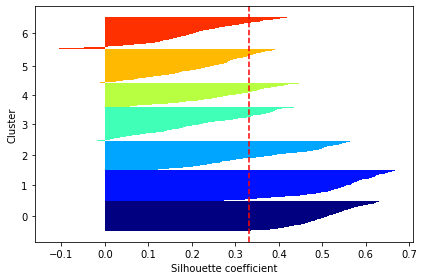

In [14]:
plot_silhouettes(df_N, clusters)

In [15]:
from sklearn.metrics import completeness_score, homogeneity_score
print(completeness_score(df_classes.iloc[:, 1],clusters))

0.6131870124853009


In [16]:
print(homogeneity_score(df_classes.iloc[:, 1],clusters))

0.6115021163370862


C) Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [17]:
import numpy as np
meanVals = np.mean(df_N, axis=0)
meanRemoved = df_N - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print(covMat)

[[ 0.08  0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.    0.    0.01  0.01 -0.01  0.    0.
   0.01 -0.01  0.  ]
 [ 0.    0.06  0.    0.    0.    0.   -0.    0.   -0.   -0.03 -0.03 -0.03 -0.03  0.02 -0.02  0.02
  -0.03  0.    0.04]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.    0.    0.02 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    0.   -0.    0.
  -0.   -0.    0.  ]
 [-0.    0.    0.   -0.    0.01  0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.   -0.
  -0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.01  0.    0.    0.   -0.   -0.    0.   -0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.    0.
   0.    0.   -0.  ]
 [-0.    0.    0.   -0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.   -0.    0.   -0.
   0.   -0.   -0.  ]
 [ 0.   -0.    0.   -0.    0.    0.    0.    0.    0.    0.   

In [18]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))

In [19]:
print(eigVals)

[0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [20]:
print(eigVects)

[[ 0.03 -0.35  0.93  0.04 -0.01  0.03  0.01  0.03 -0.   -0.02 -0.01  0.01 -0.    0.    0.   -0.
  -0.   -0.    0.  ]
 [-0.19 -0.38 -0.12 -0.66 -0.47  0.14 -0.24  0.22  0.06  0.07  0.06 -0.04 -0.01 -0.01  0.    0.
  -0.   -0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    1.  ]
 [-0.01 -0.03 -0.04 -0.03  0.06  0.6   0.72  0.32  0.06  0.08  0.01 -0.01 -0.   -0.    0.    0.
   0.    0.    0.  ]
 [-0.    0.02  0.01 -0.1  -0.09 -0.44  0.28  0.32 -0.77  0.05  0.07 -0.    0.01  0.   -0.   -0.
  -0.    0.    0.  ]
 [ 0.    0.02  0.01 -0.12 -0.03 -0.42  0.3   0.11  0.44 -0.34  0.55  0.28 -0.11 -0.01 -0.   -0.
  -0.   -0.    0.  ]
 [ 0.    0.01  0.01 -0.01 -0.01 -0.18  0.12  0.07  0.18 -0.14  0.05 -0.77  0.55  0.01 -0.    0.
  -0.    0.    0.  ]
 [ 0.01  0.   -0.   -0.14 -0.03 -0.33  0.19  0.16  0.29 -0.02 -0.77  0.29  0.21 -0.01 -0.   -0.
   0.   -0.    0.  ]
 [ 0.    0.    0.   -0.02 -0.01 -0.16  0.09  0.07  0.13 -0.05 -0

In [21]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[0.48 0.1  0.08 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[60.71 13.2  10.12  4.54  3.55  1.99  1.89  1.62  1.07  0.71  0.39  0.16  0.05  0.    0.    0.
  0.    0.    0.  ]


In [22]:
pca = 0
for i in range(0,len(varPercentage)):
    pca = pca + varPercentage[i]
    print(i+1,pca)

1 60.714233968533236
2 73.91121320168925
3 84.03498614256189
4 88.57852534332582
5 92.12588648109565
6 94.1139219796062
7 96.00589227704954
8 97.62130108194513
9 98.68690193362029
10 99.3982394514953
11 99.79044297671408
12 99.94794328616065
13 99.99685835864892
14 99.9999999999999
15 99.99999999999993
16 99.99999999999994
17 99.99999999999996
18 99.99999999999997
19 99.99999999999997


From the above results, On 7th PC the variance is greater then 95%. So, 7 Principle components are needed to capture at least 95% of variance in the data.

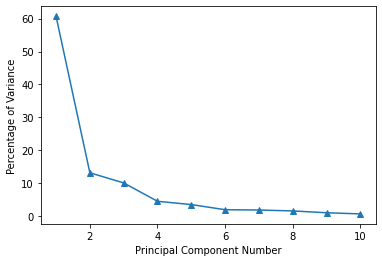

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [24]:
topNfeat = 7
topEigValInd = eigValInd[:topNfeat]  #cut off unwanted dimensions
reducedEigVects = eigVects[:,topEigValInd]   #reorganize eig vects largest to smallest
reducedDT = np.dot(meanRemoved, reducedEigVects)    #transform data into new dimensions
print(reducedDT)


[[-0.69 -0.53 -0.25 ... -0.08 -0.05 -0.05]
 [-0.67 -0.51 -0.34 ... -0.04 -0.06 -0.04]
 [-0.71 -0.77  0.16 ... -0.17 -0.04 -0.06]
 ...
 [-0.51  0.13  0.08 ... -0.03  0.03 -0.11]
 [-0.48  0.09  0.16 ...  0.    0.   -0.09]
 [-0.44  0.11  0.05 ...  0.02  0.21  0.15]]


d) Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.


In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,max_iter=1000,verbose=0)
kmeans.fit(reducedDT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
clusters = kmeans.predict(reducedDT)
clusters

array([5, 5, 5, ..., 6, 6, 2], dtype=int32)

In [27]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,5
1,5
2,5
3,5
4,5
...,...
2095,0
2096,2
2097,6
2098,6


In [28]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6
0,-0.60,0.36,-0.11,0.13,-0.13,0.02,-0.04
1,1.41,-0.09,-0.04,0.17,-0.03,0.01,-0.02
2,-0.21,0.25,-0.15,-0.06,0.13,0.01,0.03
3,0.44,0.10,-0.16,-0.23,-0.05,0.01,0.02
4,0.18,-0.04,0.27,-0.18,0.03,-0.02,0.00
5,-0.62,-0.64,-0.20,0.09,-0.07,-0.01,0.04
6,-0.51,0.06,0.34,0.07,0.08,-0.01,-0.03


In [29]:
print(silhouettes.mean())

0.332066475286672


In [30]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return


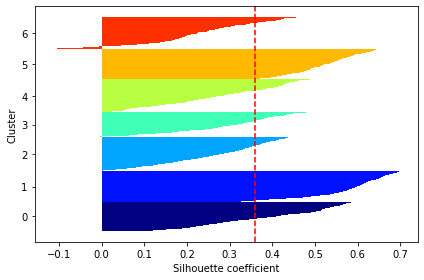

In [31]:
plot_silhouettes(reducedDT, clusters)

In [32]:
from sklearn.metrics import completeness_score, homogeneity_score
print(completeness_score(df_classes.iloc[:, 1],clusters))

0.6107955063694607


In [33]:
print(homogeneity_score(df_classes.iloc[:, 1],clusters))

0.6091364049733291


#### Before PCA
##### completeness_score:0.6116744999910891 
##### homogeneity_score : 0.6099656393147241


#### After PCA
##### completeness_score:0.6107955063694607 
##### homogeneity_score :0.6091364049733291 

The performance of the model is almost same as the scores before and after PCA are similarly the same.

### 2) Item-Based Joke Recommendation [Dataset: jokes.zip]

For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):



a) Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for at least 2 users. Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and the SVD-based version of the item-based CF (using "svdEst" as the prediction engine) to generate these recommendations for the two users and note the differences. You should show the text of the recommended jokes as well as the predicted ratings for each.

In [34]:
rating = pd.read_csv("modified_jester_data.csv", header=None)
rating.head(10)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
5,4.83,7.46,11.44,2.50,3.91,6.68,2.31,10.13,4.35,9.20,...,7.46,4.11,10.32,8.04,8.82,7.65,11.05,1.92,5.95,7.55
6,0.00,0.00,0.00,0.00,19.59,1.15,18.72,19.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,0.00,0.00,0.00,0.00
7,17.84,14.16,20.17,4.79,2.84,9.30,20.27,12.41,5.81,6.58,...,18.23,9.88,10.90,5.32,7.84,7.65,13.14,10.95,12.31,11.00
8,7.21,7.46,1.58,4.11,2.26,10.71,5.71,2.07,3.14,9.40,...,15.37,10.71,15.17,10.71,10.71,10.71,10.71,10.71,7.60,6.05
9,14.01,16.15,16.15,14.01,17.41,16.15,19.93,13.52,14.01,19.16,...,0.00,15.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
joke= pd.read_csv("jokes.csv", header=None)
joke.head(10)

,0,1
0,0,"A man visits the doctor. The doctor says ""I ha..."
1,1,This couple had an excellent relationship goin...
2,2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,3,Q. What's the difference between a man and a t...
4,4,Q. What's O. J. Simpson's Internet address? A....
5,5,Bill & Hillary are on a trip back to Arkansas....
6,6,How many feminists does it take to screw in a ...
7,7,Q. Did you hear about the dyslexic devil worsh...
8,8,A country guy goes into a city bar that has a ...
9,9,Two cannibals are eating a clown one turns to ...


In [36]:
# from the code is provided in the module itemBasedRec.py

from numpy import *
from numpy import linalg as la
import numpy as np

def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)


def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]





# This function performs evaluation on a single user based on the test_ratio
# For example, with test_ratio = 0.2, a randomly selected 20 percent of rated 
# items by the user are withheld as test data. The remaining part of the user
# profile is used as input for the estimation functions to predict the 
# withheld ratings and compute the error for this user

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	
    
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u
    
# def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
#     # Write this function to iterate over all users and for each perform evaluation by calling
#     # the above cross_validate_user function on each user. MAE will be the ratio of total error 
#     # across all test cases to the total number of test cases, across all users
#     return # MAE

def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    return

def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

def get_joke_text(jokes, id):
    return jokes[id]

# Examples:

# dataMat = np.genfromtxt('modified_jester_data.csv',delimiter=',')
# dataMat = np.mat(dataMat)

# MAE = test(dataMat, 0.2, svdEst, pearsonSim)
# MAE = test(dataMat, 0.2, standEst, pearsonSim)

# jokes = load_jokes('jokes.csv')
# print_most_similar_jokes(dataMat, jokes, 3, 5, pearsonSim)

''' Example output for "print_most_similar_jokes":

Selected joke: 

Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

Top 5 Recommended jokes are :

Q: What's the difference between a Lawyer and a Plumber? A: A Plumber works to unclog the system. 
_______________
What do you call an American in the finals of the world cup? "Hey Beer Man!" 
_______________
Q. What's 200 feet long and has 4 teeth? <P>A. The front row at a Willie Nelson Concert. 
_______________
A country guy goes into a city bar that has a dress code and the maitred' demands he wear a tie. Discouraged the guy goes to his car to sulk when inspiration strikes: He's got jumper cables in the trunk! So he wrapsthem around his neck sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d' is reluctant but says to the guy "Okay you're a pretty resourceful fellow you can come in... but just don't start anything"!   
_______________
What do you get when you run over a parakeet with a lawnmower? <P>Shredded tweet. 
_______________

'''



' Example output for "print_most_similar_jokes":\n\nSelected joke: \n\nQ. What\'s the difference between a man and a toilet? A. A toilet doesn\'t follow you around after you use it.\n\nTop 5 Recommended jokes are :\n\nQ: What\'s the difference between a Lawyer and a Plumber? A: A Plumber works to unclog the system. \n_______________\nWhat do you call an American in the finals of the world cup? "Hey Beer Man!" \n_______________\nQ. What\'s 200 feet long and has 4 teeth? <P>A. The front row at a Willie Nelson Concert. \n_______________\nA country guy goes into a city bar that has a dress code and the maitred\' demands he wear a tie. Discouraged the guy goes to his car to sulk when inspiration strikes: He\'s got jumper cables in the trunk! So he wrapsthem around his neck sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d\' is reluctant but says to the guy "Okay you\'re a pretty resourceful fellow you can come in... but just don\'t start anything

In [37]:
dataMat = np.mat(rating)

In [38]:
l =[46,51,73] 
N = 5
jokeA = np.array(joke.iloc[:,1])
for u in l:
    Recom = recommend(dataMat,u,N,pearsonSim,standEst)
    if(Recom=='you rated everything'):
        break;
    print("\nTop 5 Recommended jokes for user",u,"using prediction engine: standEst")
    print('\n\n')
    for i in range(len(Recom)):
        print("Joke number :  ",Recom[i][0],"\n",jokeA[Recom[i][0]],'\n RATING (Predicted) = ',Recom[i][1],'\n')
    print('\n\n')
# u =51
# N = 5
# jokes_arr = np.array(joke.iloc[:,1])
# recom_jokes = recommend(dataMat,u,N,pearsonSim,svdEst)
# print("Top 5 Recommended jokes for user#",u)
    
# for i in range(len(recom_jokes)):
#     print("Joke number :  ",recom_jokes[i][0],"\n",jokes_arr[recom_jokes[i][0]],'\n RATING (Predicted) = ',recom_jokes[i][1],'\n')
# print('\n\n')


Top 5 Recommended jokes for user 46 using prediction engine: standEst



Joke number :   71 
 On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" 
 RATING (Predicted) =  16.92732138621851 

Joke number :   79 
 Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill ou

In [39]:
l =[46,51,73]
N = 5
jokeA = np.array(joke.iloc[:,1])
for u in l:
    Recom = recommend(dataMat,u,N,pearsonSim,svdEst)
    if(Recom=='you rated everything'):
        break;
    print("\nTop 5 Recommended jokes for user",u,"using prediction engine: svdEst")
    print('\n\n\n')
    for i in range(len(Recom)):
        print("Joke number :  ",Recom[i][0],"\n",jokeA[Recom[i][0]],'\n RATING (Predicted) = ',Recom[i][1],'\n')
    print('\n\n')

# u =51
# N = 5
# jokes_arr = np.array(joke.iloc[:,1])
# recom_jokes = recommend(dataMat,u,N,pearsonSim,svdEst)
# print("Top 5 Recommended jokes for user#",u)
    
# for i in range(len(recom_jokes)):
#     print("Joke number :  ",recom_jokes[i][0],"\n",jokes_arr[recom_jokes[i][0]],'\n RATING (Predicted) = ',recom_jokes[i][1],'\n')
# print('\n\n')


Top 5 Recommended jokes for user 46 using prediction engine: svdEst




Joke number :   78 
 Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40. 
 RATING (Predicted) =  16.68007133244043 

Joke number :   79 
 Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 
 RATING (Predicted) =  16.663007158414107 

Joke number :   72 
 Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference. 
 RATING (Predicted) =  16.59510236923362 

Joke number :   99 
 Q: What's the difference between 

b) Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [40]:
# totCount = 0
# totError = 0
# for u in range(M):
#     err_u = 0
#     rateCount_u = 0
#     for j in range(N):
#         if (Ratings[u,j] > 0): ### Only use known ratings computing error
#             rateCount_u += 1
#             err_u += abs(np.dot(fP[u],fQ[j]) - Ratings[u,j])
#     print("Mean Absolute Error for User %d = %0.3f" %(u, err_u/rateCount_u))
#     totCount += rateCount_u
#     totError += err_u
# print
# print("Overall Mean Absolute Error = %0.3f" %(totError/totCount))



import itemBasedRec as ibr

def test(dataMat, test_ratio, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    
    # Must keep running count of MAE and number of test cases
    totCount = 0
    totError = 0

    # Iterate through 
    for i in range(len(dataMat)):
        err_u, rateCount_u = ibr.cross_validate_user(dataMat, i, test_ratio, eval(estMethod), simMeas)
        totError += err_u
        totCount += rateCount_u
        print("Mean Absolute Error for User %d = %0.3f" %(i, err_u/rateCount_u)) 
    print("\n\n\n\nOverall Mean Absolute Error = %0.3f" %(totError/totCount))

In [41]:
test(dataMat, 0.2, "standEst")


Mean Absolute Error for User 0 = 6.292
Mean Absolute Error for User 1 = 4.286
Mean Absolute Error for User 2 = 1.165
Mean Absolute Error for User 3 = 4.874
Mean Absolute Error for User 4 = 3.857
Mean Absolute Error for User 5 = 2.786
Mean Absolute Error for User 6 = 1.770
Mean Absolute Error for User 7 = 4.522
Mean Absolute Error for User 8 = 3.197
Mean Absolute Error for User 9 = 2.119
Mean Absolute Error for User 10 = 3.049
Mean Absolute Error for User 11 = 2.241
Mean Absolute Error for User 12 = 1.242
Mean Absolute Error for User 13 = 3.971
Mean Absolute Error for User 14 = 5.143
Mean Absolute Error for User 15 = 3.048
Mean Absolute Error for User 16 = 3.749
Mean Absolute Error for User 17 = 2.705
Mean Absolute Error for User 18 = 2.718
Mean Absolute Error for User 19 = 5.029
Mean Absolute Error for User 20 = 1.460
Mean Absolute Error for User 21 = 3.577
Mean Absolute Error for User 22 = 3.144
Mean Absolute Error for User 23 = 5.166
Mean Absolute Error for User 24 = 2.659
Mean Absol

Mean Absolute Error for User 203 = 2.772
Mean Absolute Error for User 204 = 5.353
Mean Absolute Error for User 205 = 3.925
Mean Absolute Error for User 206 = 5.121
Mean Absolute Error for User 207 = 2.630
Mean Absolute Error for User 208 = 4.587
Mean Absolute Error for User 209 = 2.269
Mean Absolute Error for User 210 = 4.833
Mean Absolute Error for User 211 = 5.586
Mean Absolute Error for User 212 = 4.734
Mean Absolute Error for User 213 = 2.491
Mean Absolute Error for User 214 = 2.665
Mean Absolute Error for User 215 = 3.302
Mean Absolute Error for User 216 = 2.739
Mean Absolute Error for User 217 = 3.318
Mean Absolute Error for User 218 = 4.914
Mean Absolute Error for User 219 = 1.925
Mean Absolute Error for User 220 = 3.560
Mean Absolute Error for User 221 = 1.753
Mean Absolute Error for User 222 = 4.937
Mean Absolute Error for User 223 = 1.051
Mean Absolute Error for User 224 = 2.160
Mean Absolute Error for User 225 = 6.839
Mean Absolute Error for User 226 = 2.527
Mean Absolute Er

Mean Absolute Error for User 403 = 2.183
Mean Absolute Error for User 404 = 1.611
Mean Absolute Error for User 405 = 4.677
Mean Absolute Error for User 406 = 7.495
Mean Absolute Error for User 407 = 3.133
Mean Absolute Error for User 408 = 2.411
Mean Absolute Error for User 409 = 3.131
Mean Absolute Error for User 410 = 3.472
Mean Absolute Error for User 411 = 2.986
Mean Absolute Error for User 412 = 1.378
Mean Absolute Error for User 413 = 3.472
Mean Absolute Error for User 414 = 2.512
Mean Absolute Error for User 415 = 2.732
Mean Absolute Error for User 416 = 5.020
Mean Absolute Error for User 417 = 4.570
Mean Absolute Error for User 418 = 3.334
Mean Absolute Error for User 419 = 4.782
Mean Absolute Error for User 420 = 3.834
Mean Absolute Error for User 421 = 2.007
Mean Absolute Error for User 422 = 4.012
Mean Absolute Error for User 423 = 6.471
Mean Absolute Error for User 424 = 3.298
Mean Absolute Error for User 425 = 4.207
Mean Absolute Error for User 426 = 3.311
Mean Absolute Er

Mean Absolute Error for User 604 = 3.663
Mean Absolute Error for User 605 = 3.918
Mean Absolute Error for User 606 = 1.563
Mean Absolute Error for User 607 = 3.788
Mean Absolute Error for User 608 = 1.407
Mean Absolute Error for User 609 = 1.164
Mean Absolute Error for User 610 = 1.141
Mean Absolute Error for User 611 = 2.711
Mean Absolute Error for User 612 = 6.043
Mean Absolute Error for User 613 = 4.503
Mean Absolute Error for User 614 = 2.046
Mean Absolute Error for User 615 = 1.907
Mean Absolute Error for User 616 = 4.421
Mean Absolute Error for User 617 = 3.802
Mean Absolute Error for User 618 = 3.229
Mean Absolute Error for User 619 = 2.411
Mean Absolute Error for User 620 = 1.522
Mean Absolute Error for User 621 = 2.920
Mean Absolute Error for User 622 = 3.723
Mean Absolute Error for User 623 = 3.245
Mean Absolute Error for User 624 = 2.582
Mean Absolute Error for User 625 = 3.151
Mean Absolute Error for User 626 = 2.401
Mean Absolute Error for User 627 = 1.488
Mean Absolute Er

Mean Absolute Error for User 805 = 4.903
Mean Absolute Error for User 806 = 5.345
Mean Absolute Error for User 807 = 2.471
Mean Absolute Error for User 808 = 3.536
Mean Absolute Error for User 809 = 3.564
Mean Absolute Error for User 810 = 3.634
Mean Absolute Error for User 811 = 3.763
Mean Absolute Error for User 812 = 5.292
Mean Absolute Error for User 813 = 4.893
Mean Absolute Error for User 814 = 2.064
Mean Absolute Error for User 815 = 2.445
Mean Absolute Error for User 816 = 5.783
Mean Absolute Error for User 817 = 2.419
Mean Absolute Error for User 818 = 4.646
Mean Absolute Error for User 819 = 5.657
Mean Absolute Error for User 820 = 2.591
Mean Absolute Error for User 821 = 1.955
Mean Absolute Error for User 822 = 2.906
Mean Absolute Error for User 823 = 1.434
Mean Absolute Error for User 824 = 4.162
Mean Absolute Error for User 825 = 3.469
Mean Absolute Error for User 826 = 4.481
Mean Absolute Error for User 827 = 3.111
Mean Absolute Error for User 828 = 2.073
Mean Absolute Er

In [42]:
test(dataMat, 0.2, "svdEst")

Mean Absolute Error for User 0 = 5.611
Mean Absolute Error for User 1 = 4.380
Mean Absolute Error for User 2 = 4.022
Mean Absolute Error for User 3 = 4.333
Mean Absolute Error for User 4 = 3.327
Mean Absolute Error for User 5 = 2.582
Mean Absolute Error for User 6 = 2.212
Mean Absolute Error for User 7 = 4.454
Mean Absolute Error for User 8 = 2.768
Mean Absolute Error for User 9 = 1.979
Mean Absolute Error for User 10 = 3.081
Mean Absolute Error for User 11 = 2.498
Mean Absolute Error for User 12 = 2.082
Mean Absolute Error for User 13 = 4.546
Mean Absolute Error for User 14 = 5.975
Mean Absolute Error for User 15 = 3.332
Mean Absolute Error for User 16 = 4.175
Mean Absolute Error for User 17 = 2.192
Mean Absolute Error for User 18 = 1.696
Mean Absolute Error for User 19 = 5.833
Mean Absolute Error for User 20 = 2.593
Mean Absolute Error for User 21 = 2.621
Mean Absolute Error for User 22 = 4.531
Mean Absolute Error for User 23 = 4.372
Mean Absolute Error for User 24 = 2.456
Mean Absol

Mean Absolute Error for User 203 = 3.715
Mean Absolute Error for User 204 = 4.169
Mean Absolute Error for User 205 = 4.239
Mean Absolute Error for User 206 = 6.179
Mean Absolute Error for User 207 = 2.197
Mean Absolute Error for User 208 = 3.553
Mean Absolute Error for User 209 = 2.017
Mean Absolute Error for User 210 = 3.687
Mean Absolute Error for User 211 = 5.255
Mean Absolute Error for User 212 = 4.921
Mean Absolute Error for User 213 = 2.320
Mean Absolute Error for User 214 = 4.071
Mean Absolute Error for User 215 = 2.097
Mean Absolute Error for User 216 = 2.358
Mean Absolute Error for User 217 = 4.984
Mean Absolute Error for User 218 = 5.353
Mean Absolute Error for User 219 = 3.398
Mean Absolute Error for User 220 = 4.110
Mean Absolute Error for User 221 = 1.873
Mean Absolute Error for User 222 = 2.815
Mean Absolute Error for User 223 = 1.317
Mean Absolute Error for User 224 = 1.414
Mean Absolute Error for User 225 = 6.229
Mean Absolute Error for User 226 = 2.606
Mean Absolute Er

Mean Absolute Error for User 403 = 2.132
Mean Absolute Error for User 404 = 2.017
Mean Absolute Error for User 405 = 5.480
Mean Absolute Error for User 406 = 6.206
Mean Absolute Error for User 407 = 3.050
Mean Absolute Error for User 408 = 2.211
Mean Absolute Error for User 409 = 3.317
Mean Absolute Error for User 410 = 4.139
Mean Absolute Error for User 411 = 3.010
Mean Absolute Error for User 412 = 1.914
Mean Absolute Error for User 413 = 4.074
Mean Absolute Error for User 414 = 3.254
Mean Absolute Error for User 415 = 6.436
Mean Absolute Error for User 416 = 4.688
Mean Absolute Error for User 417 = 3.194
Mean Absolute Error for User 418 = 4.164
Mean Absolute Error for User 419 = 5.449
Mean Absolute Error for User 420 = 2.890
Mean Absolute Error for User 421 = 1.590
Mean Absolute Error for User 422 = 2.690
Mean Absolute Error for User 423 = 5.186
Mean Absolute Error for User 424 = 3.626
Mean Absolute Error for User 425 = 4.433
Mean Absolute Error for User 426 = 3.965
Mean Absolute Er

Mean Absolute Error for User 604 = 4.928
Mean Absolute Error for User 605 = 4.119
Mean Absolute Error for User 606 = 1.310
Mean Absolute Error for User 607 = 3.708
Mean Absolute Error for User 608 = 1.893
Mean Absolute Error for User 609 = 1.976
Mean Absolute Error for User 610 = 1.675
Mean Absolute Error for User 611 = 1.082
Mean Absolute Error for User 612 = 5.609
Mean Absolute Error for User 613 = 6.323
Mean Absolute Error for User 614 = 2.270
Mean Absolute Error for User 615 = 2.504
Mean Absolute Error for User 616 = 4.614
Mean Absolute Error for User 617 = 3.958
Mean Absolute Error for User 618 = 4.197
Mean Absolute Error for User 619 = 3.832
Mean Absolute Error for User 620 = 1.630
Mean Absolute Error for User 621 = 3.109
Mean Absolute Error for User 622 = 3.801
Mean Absolute Error for User 623 = 3.548
Mean Absolute Error for User 624 = 1.984
Mean Absolute Error for User 625 = 4.373
Mean Absolute Error for User 626 = 4.398
Mean Absolute Error for User 627 = 2.287
Mean Absolute Er

Mean Absolute Error for User 805 = 4.202
Mean Absolute Error for User 806 = 5.035
Mean Absolute Error for User 807 = 2.882
Mean Absolute Error for User 808 = 3.906
Mean Absolute Error for User 809 = 4.315
Mean Absolute Error for User 810 = 3.875
Mean Absolute Error for User 811 = 2.991
Mean Absolute Error for User 812 = 5.328
Mean Absolute Error for User 813 = 4.231
Mean Absolute Error for User 814 = 2.050
Mean Absolute Error for User 815 = 2.622
Mean Absolute Error for User 816 = 4.338
Mean Absolute Error for User 817 = 2.750
Mean Absolute Error for User 818 = 3.275
Mean Absolute Error for User 819 = 6.246
Mean Absolute Error for User 820 = 1.596
Mean Absolute Error for User 821 = 1.557
Mean Absolute Error for User 822 = 1.899
Mean Absolute Error for User 823 = 1.332
Mean Absolute Error for User 824 = 2.778
Mean Absolute Error for User 825 = 4.300
Mean Absolute Error for User 826 = 4.771
Mean Absolute Error for User 827 = 3.723
Mean Absolute Error for User 828 = 2.697
Mean Absolute Er

c) Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings. [Note: For hints on how to accomplish this task, please see comments at the end of the provided module as well as comments for the provided stub function.]

In [43]:
rating1 = pd.read_csv("modified_jester_data.csv", header=None).values
data = rating1.T
jokeA = np.array(joke.iloc[:,1])
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    le = preprocessing.LabelEncoder()
    knn_ = le.fit_transform(jokes)
    knn = KNeighborsClassifier()
    knn.fit(dataMat, knn_)
    f, t = knn.kneighbors([dataMat[queryJoke]], n_neighbors = k+1) 
    t = t.tolist()
    t = [[x for x in y if x != queryJoke] for y in t]
    g = jokes[t]
    for i in range(len(g)):
        print("\n")
        print("Joke number:", i+1 ,"similarity:" ,metric(dataMat[queryJoke], dataMat[i]))
        print(g[i])
print_most_similar_jokes(data,jokeA, 29, 5, metric = pearsonSim)



Joke number: 1 similarity: 0.7197405302080393
The Chukcha (Russian Eskimo) phones up the Russian Parliament Building.  A guard answers. Chukcha:  "What is required to become Parliament member?"Guard:  "What are you an idiot?"Chukcha:  "Is it required?"


Joke number: 2 similarity: 0.6614635821246622
What do you get when you run over a parakeet with a lawnmower? Shredded tweet.


Joke number: 3 similarity: 0.7879384178265028
Did you hear that Clinton has announced there is a new national bird?  The spread eagle.


Joke number: 4 similarity: 0.8127096111748633
Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.


Joke number: 5 similarity: 0.5511943323181557
What do you call an American in the finals of the world cup?"Hey Beer Man!"


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


[Extra Credit]: Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure. Your training function should be able to use different similarity functions (passed as a parameter) including Cosine Similarity or Pearson Correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities data structure and return the predicted rating on the target item for the target user. The predicted rating should be based on the weighted average of the target user's ratings on k most similar items to the target item. You should test the prediction accuracy of your estimation function (using a cross-validation similar to part b, above) and provide a plot of cross-validation accuracies across a range of values of k. Using the best value of k, demonstrate the functionality of your recommender by generating recommendations for several anecdotal users (similar to part a, above).

In [44]:
rating = pd.read_csv("modified_jester_data.csv", header=None)
joke= pd.read_csv("jokes.csv", header=None)


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(rating.T,joke, test_size=0.2, random_state=33)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
78,0.00,19.64,0.00,0.00,0.00,1.15,0.00,1.87,10.71,0.00,...,0.00,0.00,0.00,17.60,15.90,7.55,4.06,0.00,7.21,0.00
97,0.00,11.34,0.00,0.00,17.55,1.92,0.00,10.95,10.71,0.00,...,0.00,0.00,0.00,0.00,14.64,5.47,0.00,0.00,3.77,0.00
29,3.57,17.99,0.00,0.00,15.61,4.06,0.00,6.83,10.71,16.15,...,0.00,9.59,6.34,12.07,16.58,5.13,9.79,10.03,3.62,13.67
84,0.00,19.98,0.00,11.63,14.93,10.71,0.00,1.10,7.60,15.56,...,12.21,0.00,0.00,0.00,15.95,7.89,0.00,0.00,4.16,0.00
38,2.60,10.13,20.08,18.18,15.51,5.61,0.00,4.93,15.42,14.01,...,16.05,14.45,10.81,14.83,14.40,7.80,15.76,11.24,3.38,14.25


In [45]:
y_train

,0,1
78,78,Q: Ever wonder why the IRS calls it Form 1040?...
97,97,Age and Womanhood1. Between the ages of 13 and...
29,29,Q: What's the difference between a Lawyer and ...
84,84,Q: How many Presidents does it take to screw i...
38,38,What is the difference between men and women:A...
...,...,...
18,18,Q: If a person who speaks three languages is c...
66,66,Once upon a time two brooms fell in love and d...
88,88,A radio conversation of a US naval ship with C...
7,7,Q. Did you hear about the dyslexic devil worsh...


The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities data structure and return the predicted rating on the target item for the target user. The predicted rating should be based on the weighted average of the target user's ratings on k most similar items to the target item. You should test the prediction accuracy of your estimation function (using a cross-validation similar to part b, above) and provide a plot of cross-validation accuracies across a range of values of k. Using the best value of k, demonstrate the functionality of your recommender by generating recommendations for several anecdotal users (similar to part a, above).